In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('online_shoppers_intention.xlsx')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Check for missing values

In [3]:
df.isna().sum()*100/len(df)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

#### Conclusion:
-  It is a clean dataset with no missing values

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

#### Checking the data type and values of special day

In [5]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Conclusion :
- 'object' and int  Type : should be of type category
- 'boolean' Type should also be of type Categorical but first they have to be converted to 1 and 0

In [7]:
object_type=df.select_dtypes(include=[object,int]).columns.tolist()
for i in object_type:
    df[i]=df[i].astype('category')
bool_type=df.select_dtypes(include=['bool']).columns.tolist()
for i in bool_type:
    df[i]=df[i].apply(lambda x: 1 if x else 0)
    df[i]=df[i].astype('category')
df['Administrative']=df['Administrative'].astype(int)
df['ProductRelated']=df['ProductRelated'].astype(int)
df['SpecialDay']=df['SpecialDay'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int32   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  category
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int32   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [9]:
df['Informational'].value_counts()

Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
16       1
24       1
Name: count, dtype: int64

### Dividing the groups of variables in to categorical and non categorical type

In [10]:
num_type=df.select_dtypes(exclude=['category']).columns.tolist()
cat_type=df.select_dtypes(include=['category']).columns.tolist()

### Univariate Numerical  Analysis

In [11]:
def Univariate(df, var_group):
    """
    Generates univariate distribution plots (KDE plots) for numerical variables,
    displaying key statistical measures and highlighting min/max, mean, median,
    and the mean +/- one standard deviation range.

    Args:
        df (pd.DataFrame): The input DataFrame containing the numerical variables.
        var_group (list): A list of column names (strings) for the numerical
                          variables to be plotted.
    """
    size = len(var_group)
    # Dynamically adjust figure height based on the number of variables
    # 5 inches per subplot usually gives good vertical spacing
    plt.figure(figsize=(10, 5 * size), dpi=150)

    for j, i in enumerate(var_group):
        # Calculate statistical measures
        maxi = df[i].max()
        mini = df[i].min()
        median = df[i].median()
        rnge = maxi - mini
        skew = df[i].skew()
        kurt = df[i].kurtosis()
        std_dev = df[i].std()
        mean = df[i].mean()

        # Calculate the range for mean +/- one standard deviation
        # This is commonly referred to as the 1-sigma interval around the mean
        std_dev_lower_bound = mean - std_dev
        std_dev_upper_bound = mean + std_dev

        # Create subplot
        plt.subplot(size, 1, j + 1)

        # Plot KDE (Kernel Density Estimate)
        sns.kdeplot(df[i], fill=True, color='skyblue', alpha=0.6, linewidth=2)

        # Plot mean +/- std_dev range as a line
        sns.lineplot(x=[std_dev_lower_bound, std_dev_upper_bound], y=[0, 0],
                     color='black', linestyle='--', linewidth=2,
                     label="Mean $\\pm$ Std Dev") # Using LaTeX for mu/sigma for clarity

        # Plot min/max as scatter points
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', s=100, zorder=5,
                        label="Min/Max")

        # Plot mean as a scatter point
        sns.scatterplot(x=[mean], y=[0], color='red', s=100, zorder=5,
                        label="Mean")

        # Plot median as a scatter point
        sns.scatterplot(x=[median], y=[0], color='blue', s=100, zorder=5,
                        label="Median")

        # Set labels and title
        plt.xlabel(f'{i}', fontsize=12)
        plt.ylabel('Density', fontsize=12)

        # Format and display statistics in the title for better legibility
        title_stats = (
            f"Std Dev: {std_dev:.2f} | Mean: {mean:.2f} | Median: {median:.2f}\n"
            f"Range: {rnge:.2f} | Skewness: {skew:.2f} | Kurtosis: {kurt:.2f}"
        )
        plt.title(f'Distribution of {i}\n{title_stats}', fontsize=12, loc='center', wrap=True)

        # Adjust tick font sizes
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Add a grid for easier value reading
        plt.grid(axis='x', linestyle=':', alpha=0.7)

        # Add a legend to each subplot
        plt.legend(loc='upper right', fontsize=9)

    # Use tight_layout to automatically adjust subplot parameters for a tight layout
    # This ensures titles, labels, and legends do not overlap.
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for a potential suptitle
    plt.suptitle('Univariate Numerical Distributions', fontsize=16, y=1.0) # Overall title for the entire figure
    

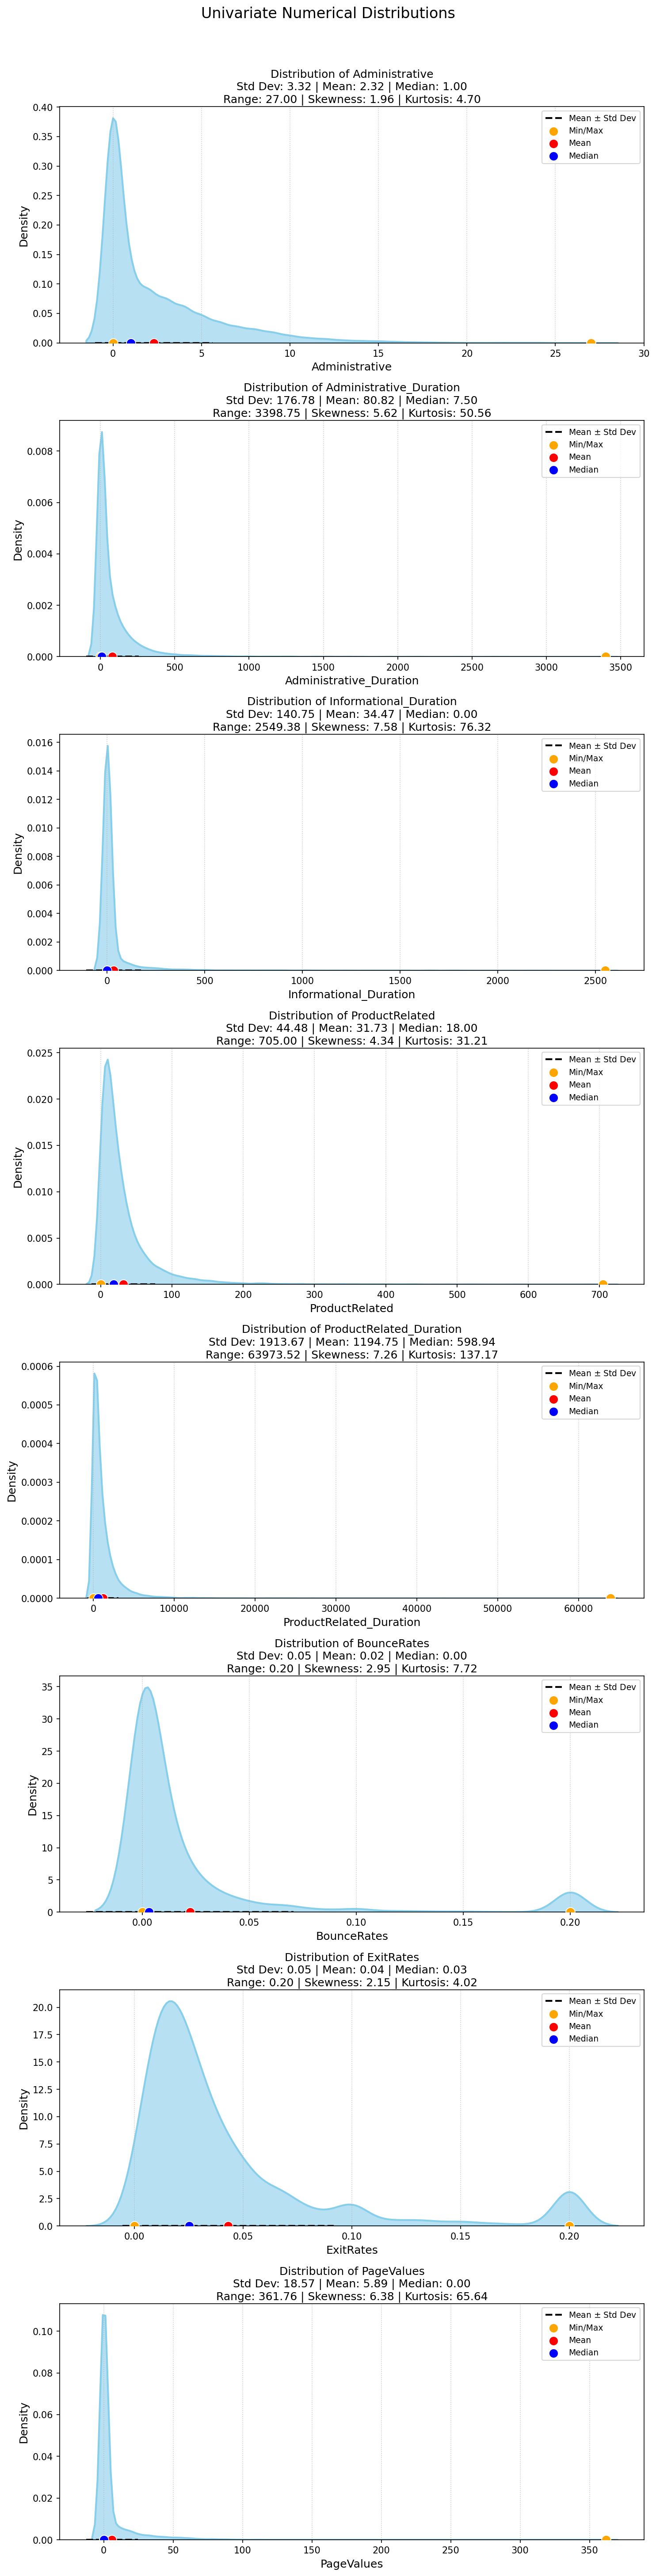

In [12]:
Univariate(df,num_type)

### Conclusions:
- There are slight tendencies of outlier :
    - ExitRates, ProductRelated Duration,Informational Duration,Administrative Duration

### Univariate categorical analysis

In [13]:
def Uni_Cat(data, var_group):
    size = len(var_group)
    # Increased figure size for better legibility and overall larger plot
    plt.figure(figsize=(12, 4 * size), dpi=150) # Adjusted height dynamically based on number of subplots

    for j, i in enumerate(var_group):
        norm = data[i].value_counts(normalize=True)
        norm_index = norm.index

        plt.subplot(size, 1, j + 1)
        sns.barplot(x=norm, y=norm_index, order=norm_index, palette='viridis') # Added a color palette
        plt.xlabel('Fraction Percent', fontsize=12) # Larger font size for x-label
        plt.ylabel(i, fontsize=12) # Larger font size for y-label
        plt.title(f'Distribution of {i}', fontsize=14) # Added a title for each subplot
        plt.xticks(fontsize=10) # Larger font size for x-ticks
        plt.yticks(fontsize=10) # Larger font size for y-ticks
        plt.grid(axis='x', linestyle='--', alpha=0.7) # Added a horizontal grid for better readability

    plt.subplots_adjust(hspace=0.6) # Reduced vertical space between subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjusts subplot params for a tight layout, leaving space for suptitle if needed
    plt.suptitle('Univariate Categorical Distributions', fontsize=16, y=1.0) # Overall title for the figure
    

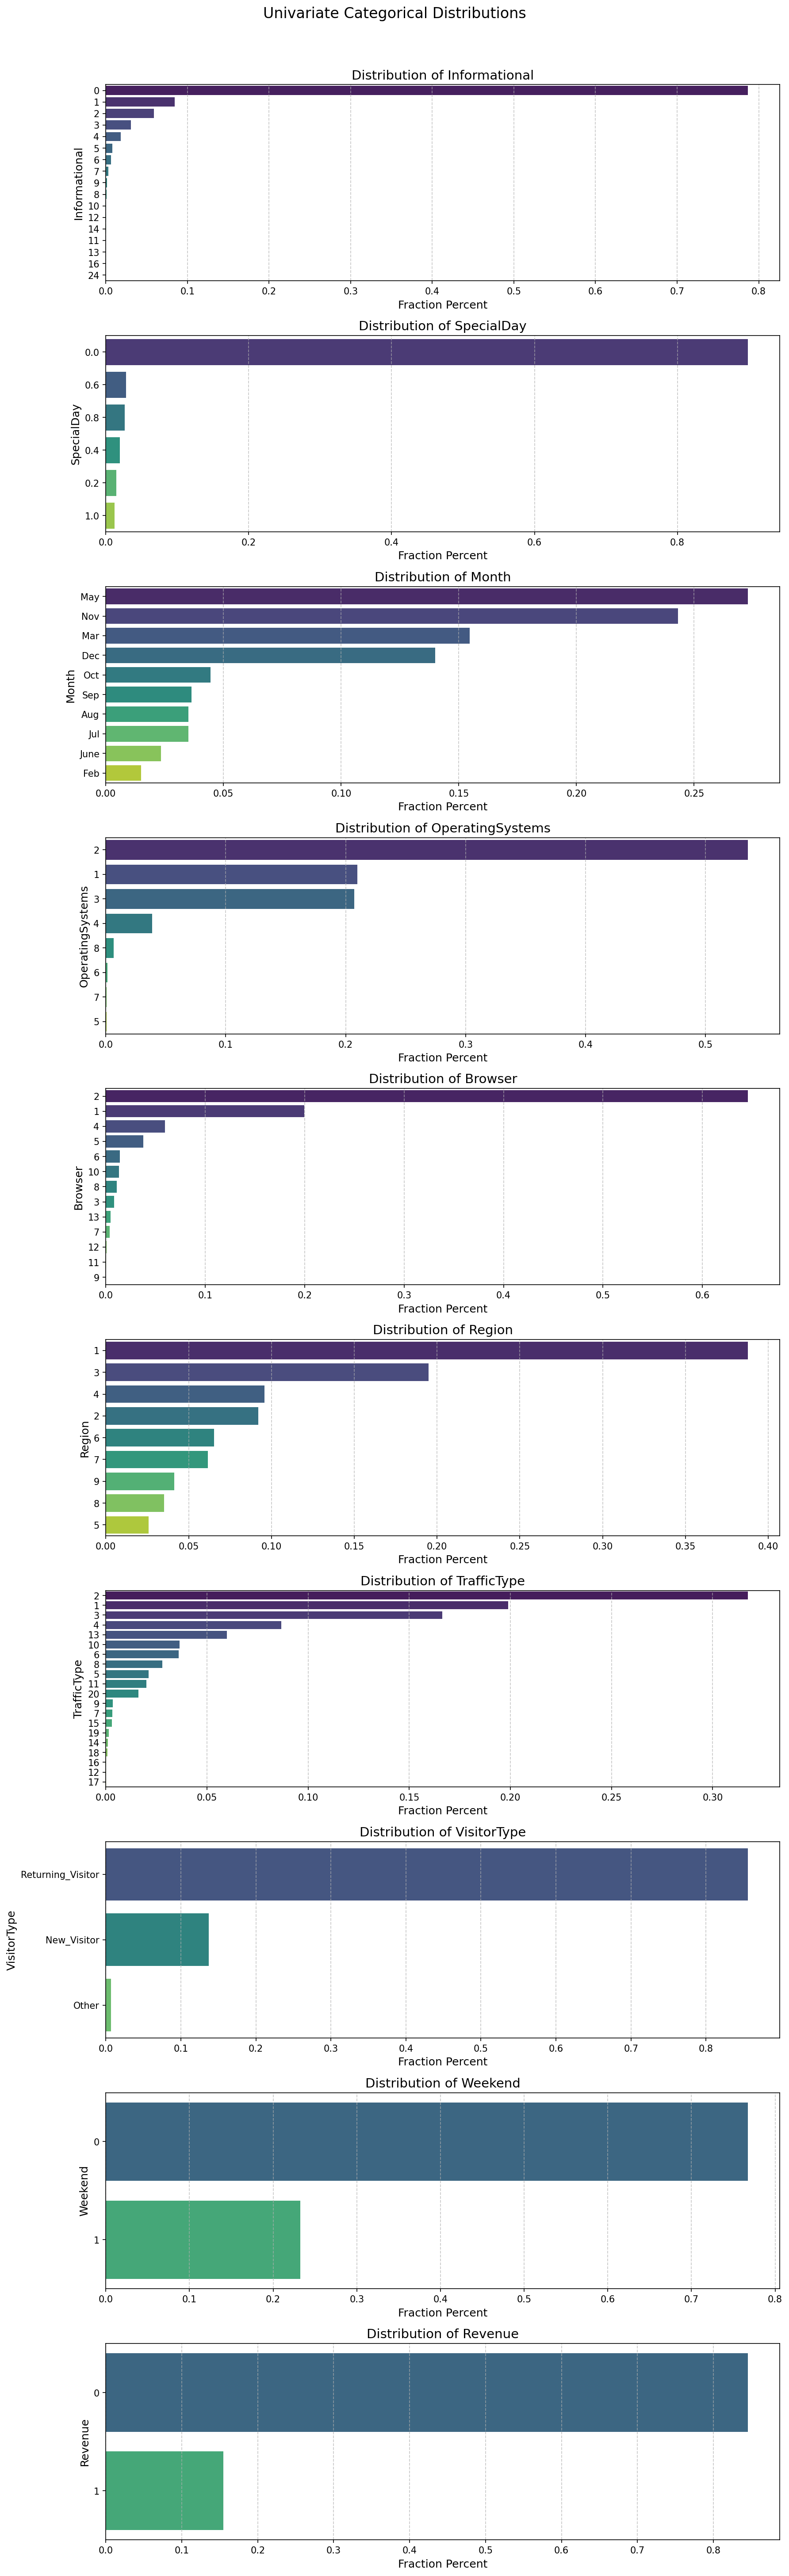

In [14]:
Uni_Cat(df,cat_type)

###  Conclusion:
- It is an imbalanced dataset we may have to use techniques like smote 

### Bivariate Analysis:

#### Bivariate Numerical Analysis

<Axes: >

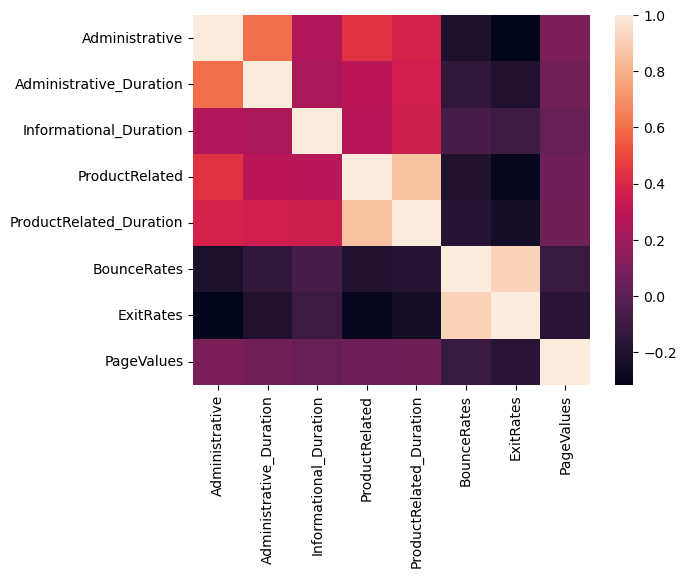

In [15]:
correlaltion=df[num_type].corr()
sns.heatmap(correlaltion)

##### Conclusion :

-['Administrative','Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration'] :  Have some correlation

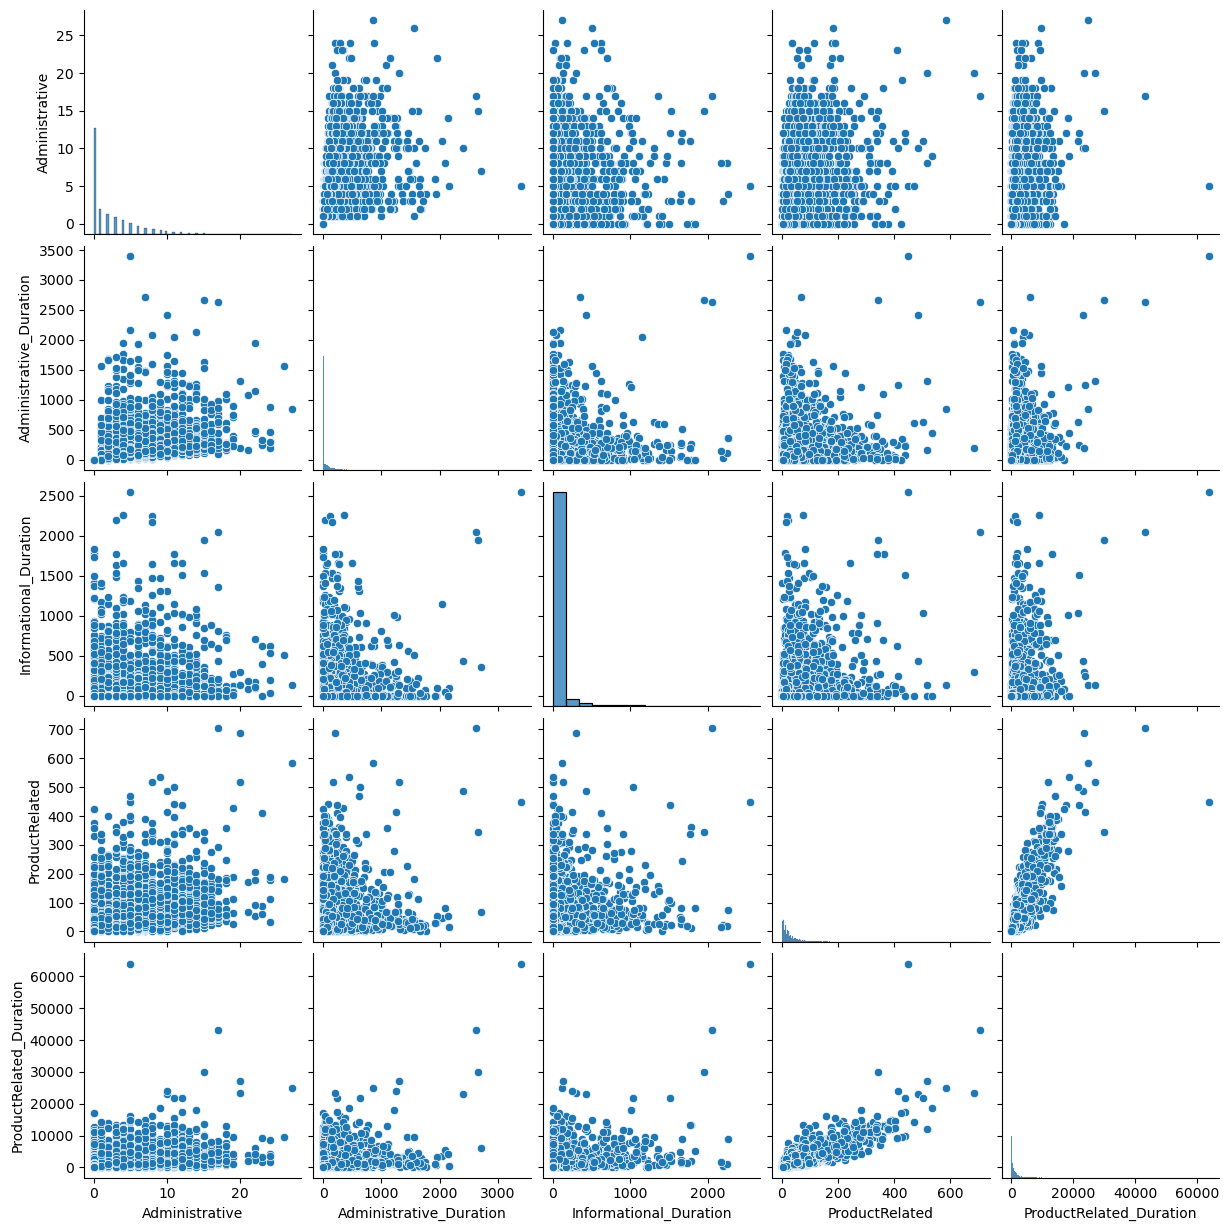

In [16]:
num_type_corr=['Administrative','Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration']
sns.pairplot(df[num_type_corr])

#### Bivariate Analysis:
- Continuous  Categorical Variable


### Hypothesis Testing

In [17]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval


def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [18]:
def Bivariate_cont_cat(data, cont, cat, category,Ho,H1):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
  if t_p_val<0.05:
    accepted_hypothesis=H1
  else:
    accepted_hypothesis=Ho

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plot_data = pd.DataFrame({
    cat: [str(category), '0'],
    'mean_value': [m1, m2]
})

  plt.subplot(1,2,1)

# Use the modern seaborn way with x, y, and data arguments
  sns.barplot(x=cat, y='mean_value', data=plot_data)

  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {:.4f} \n {}'.format(t_p_val,accepted_hypothesis))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

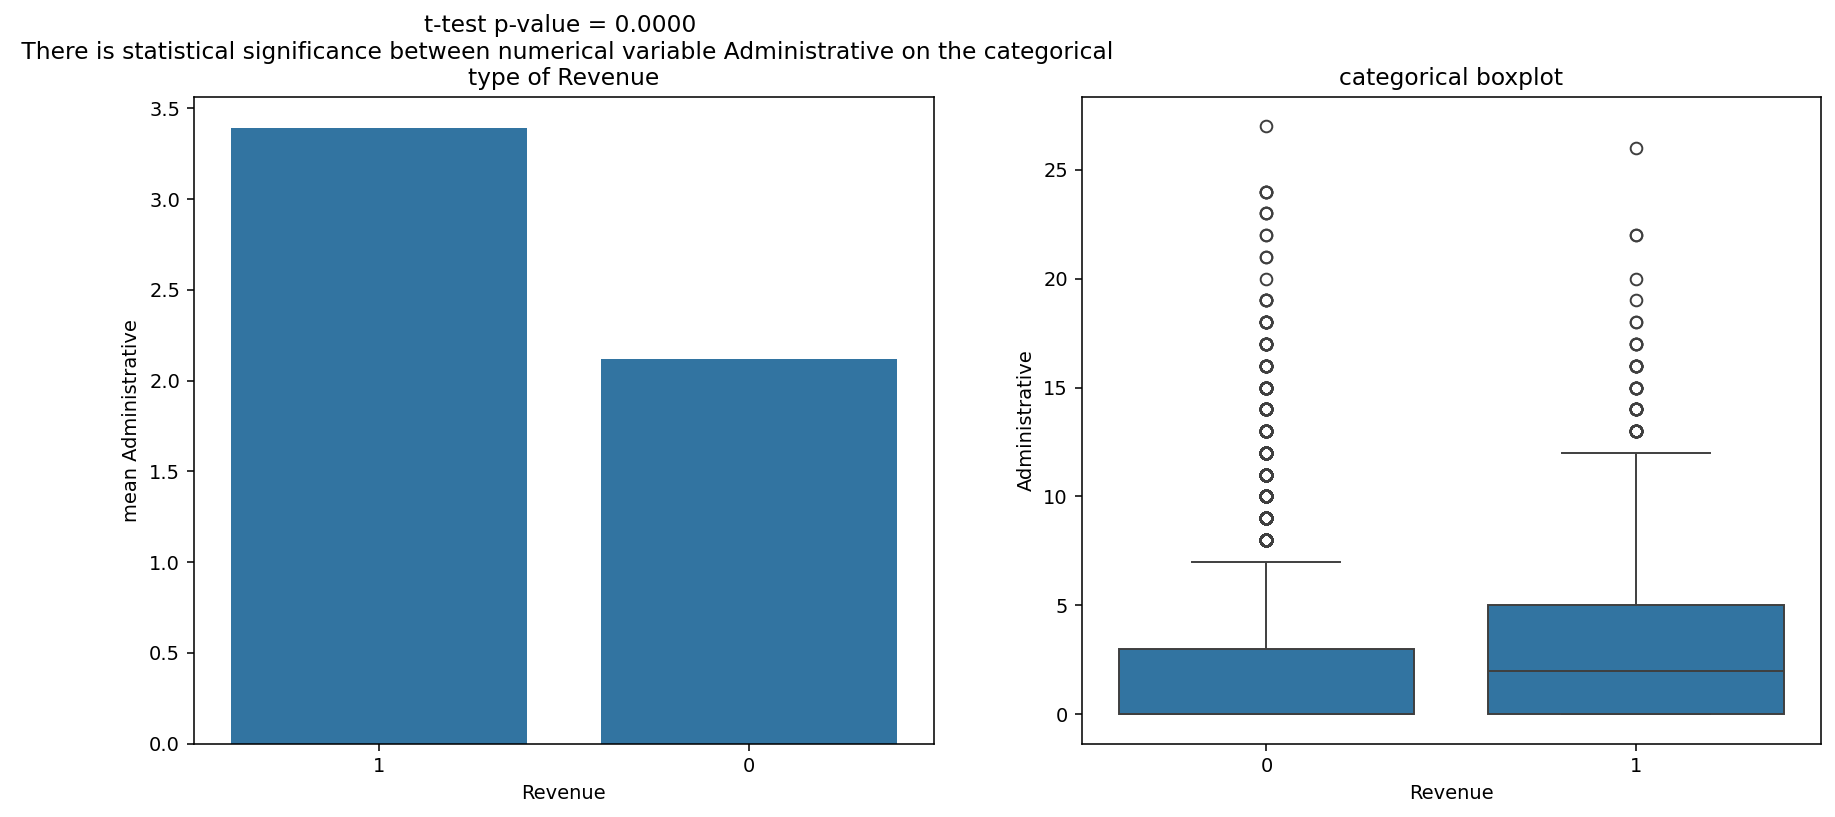

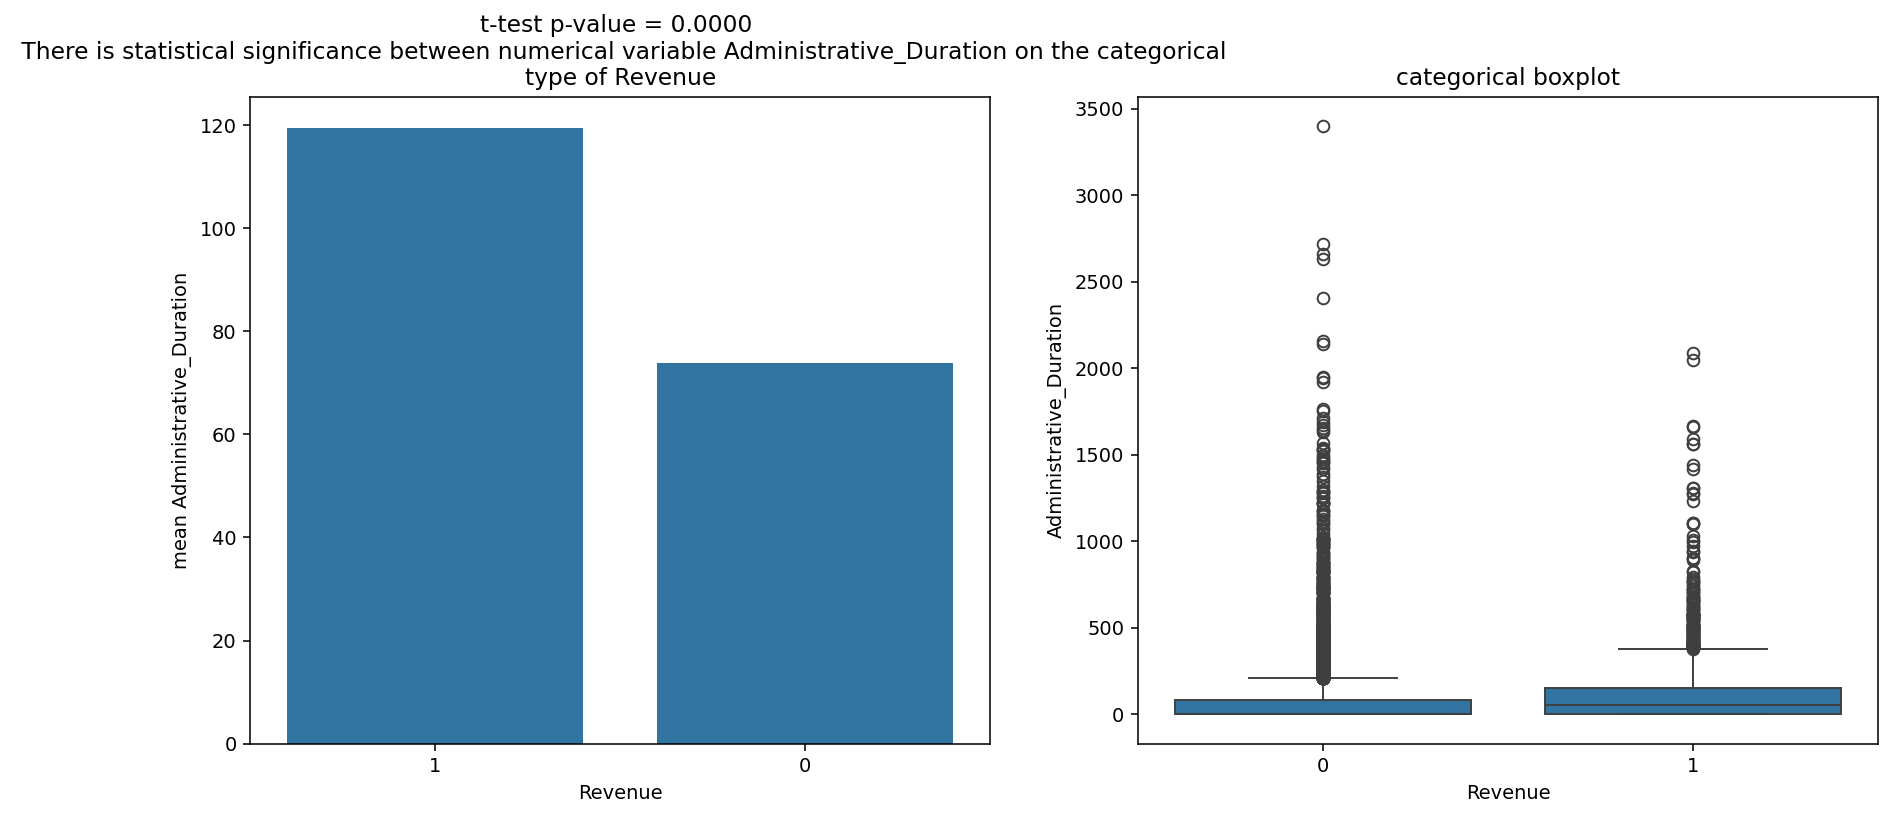

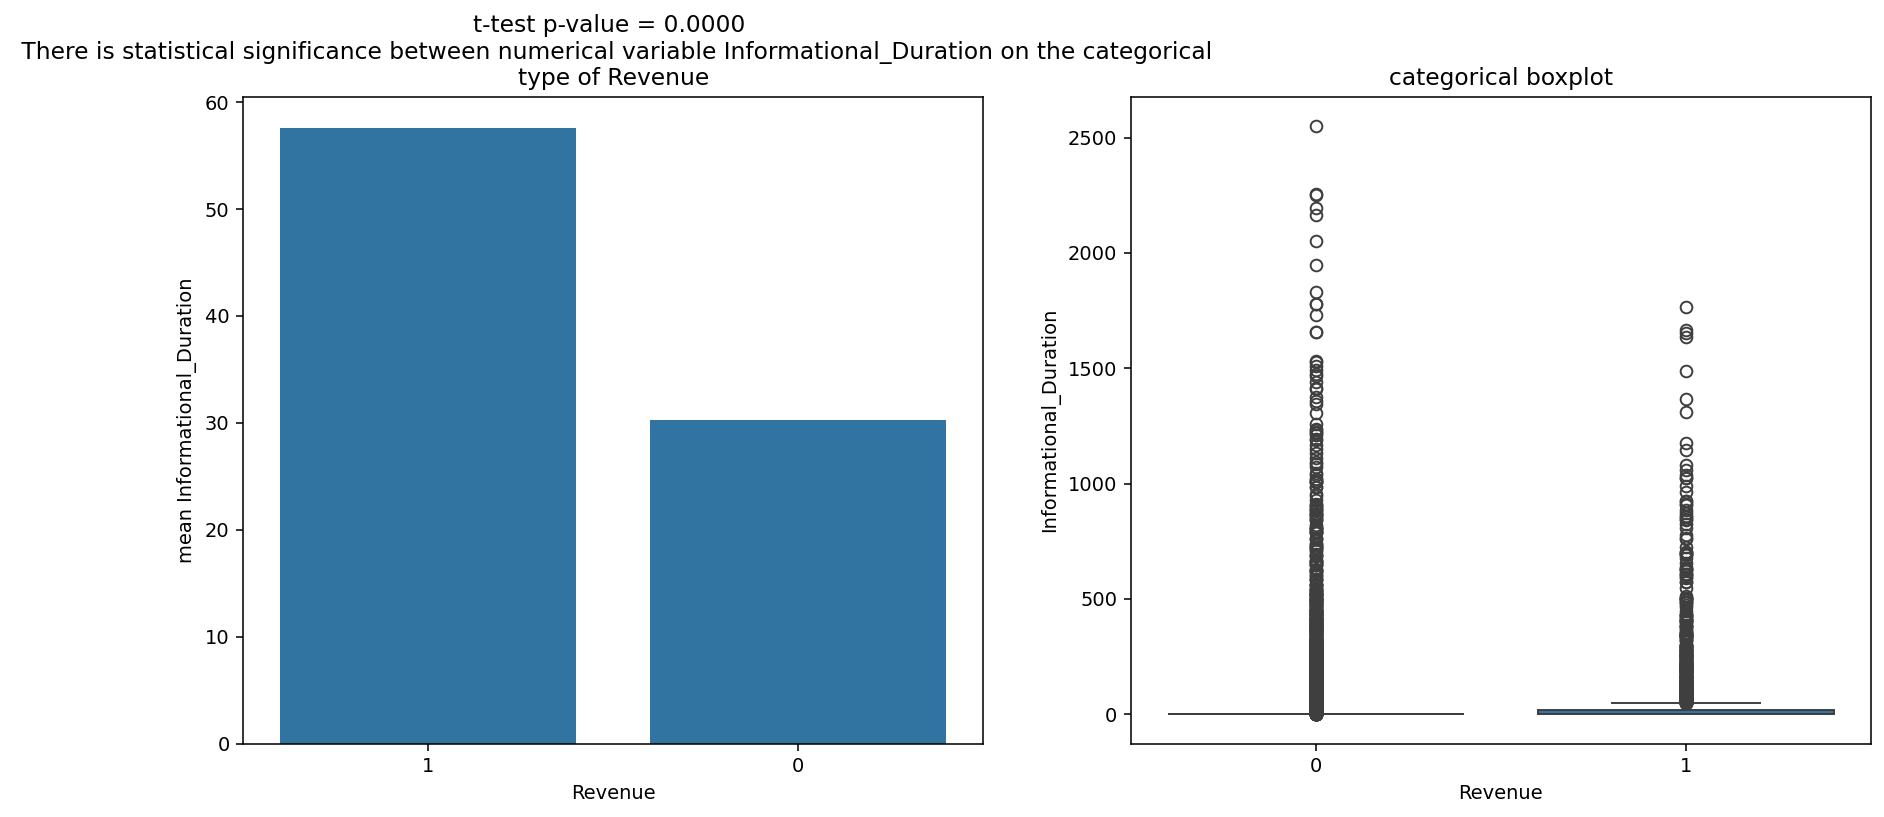

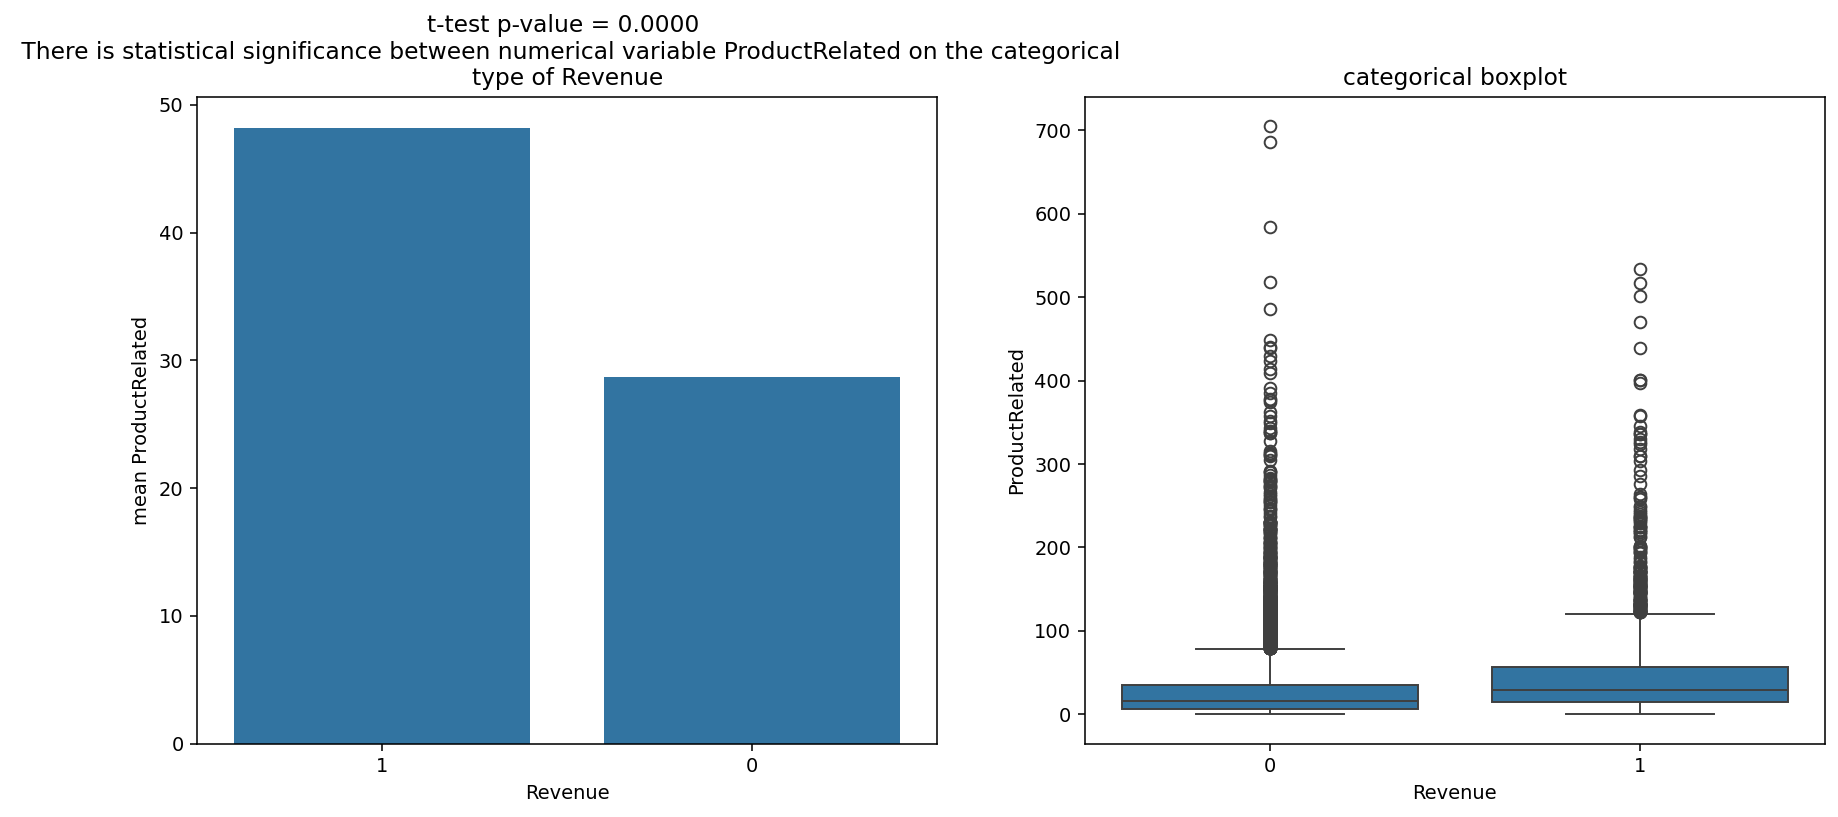

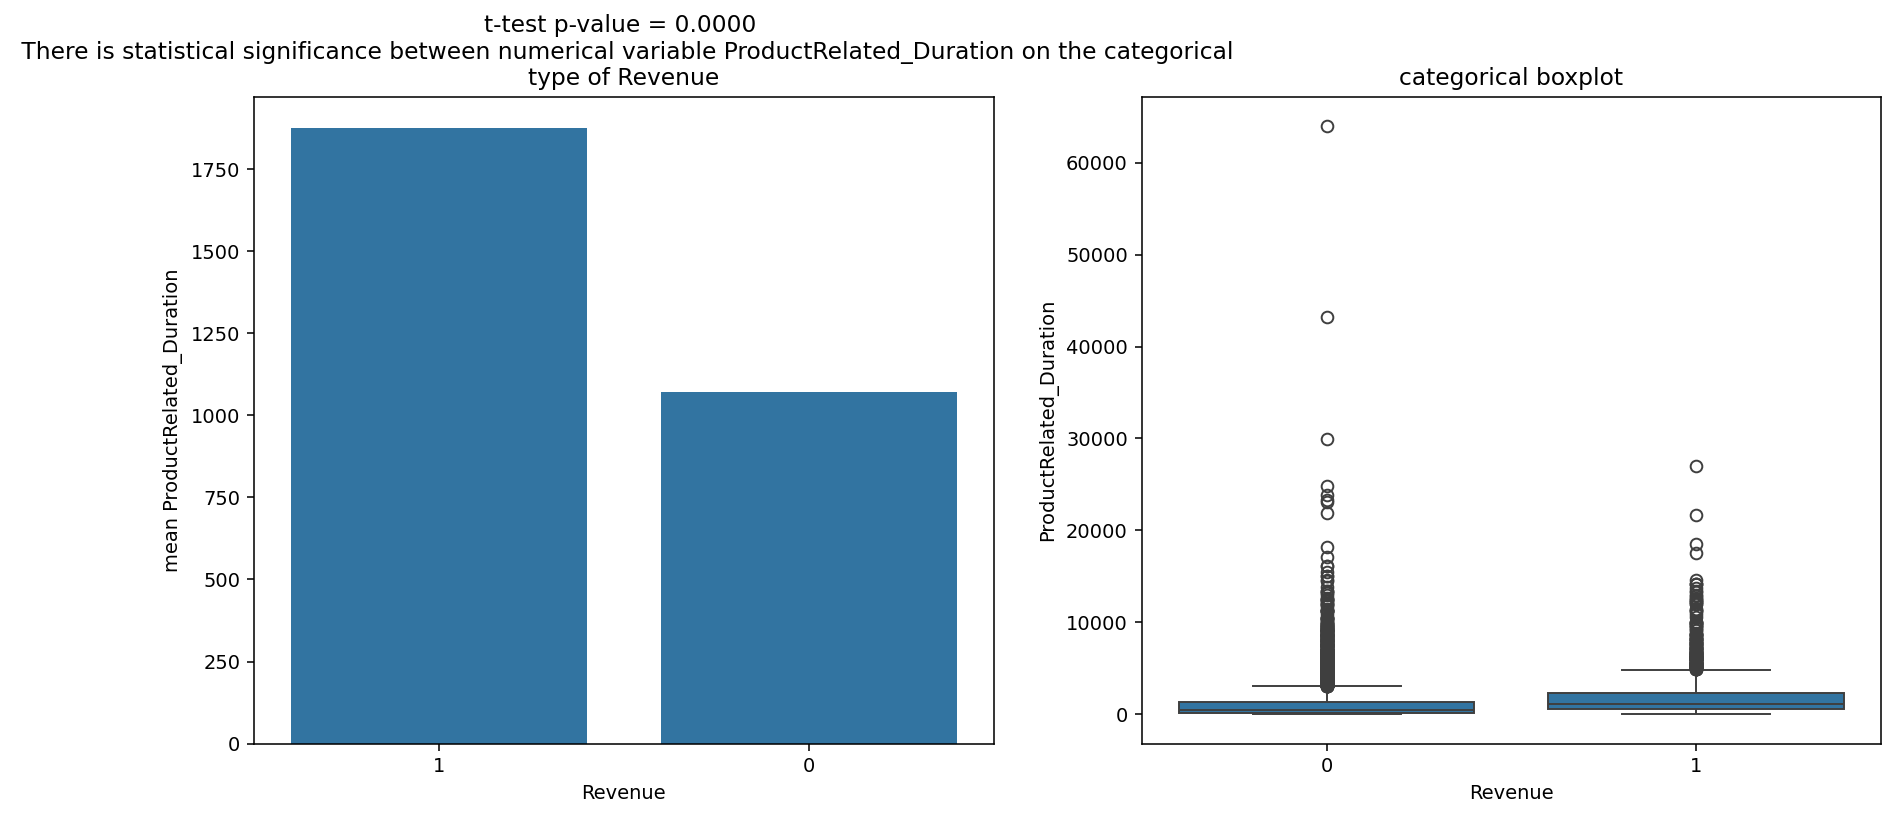

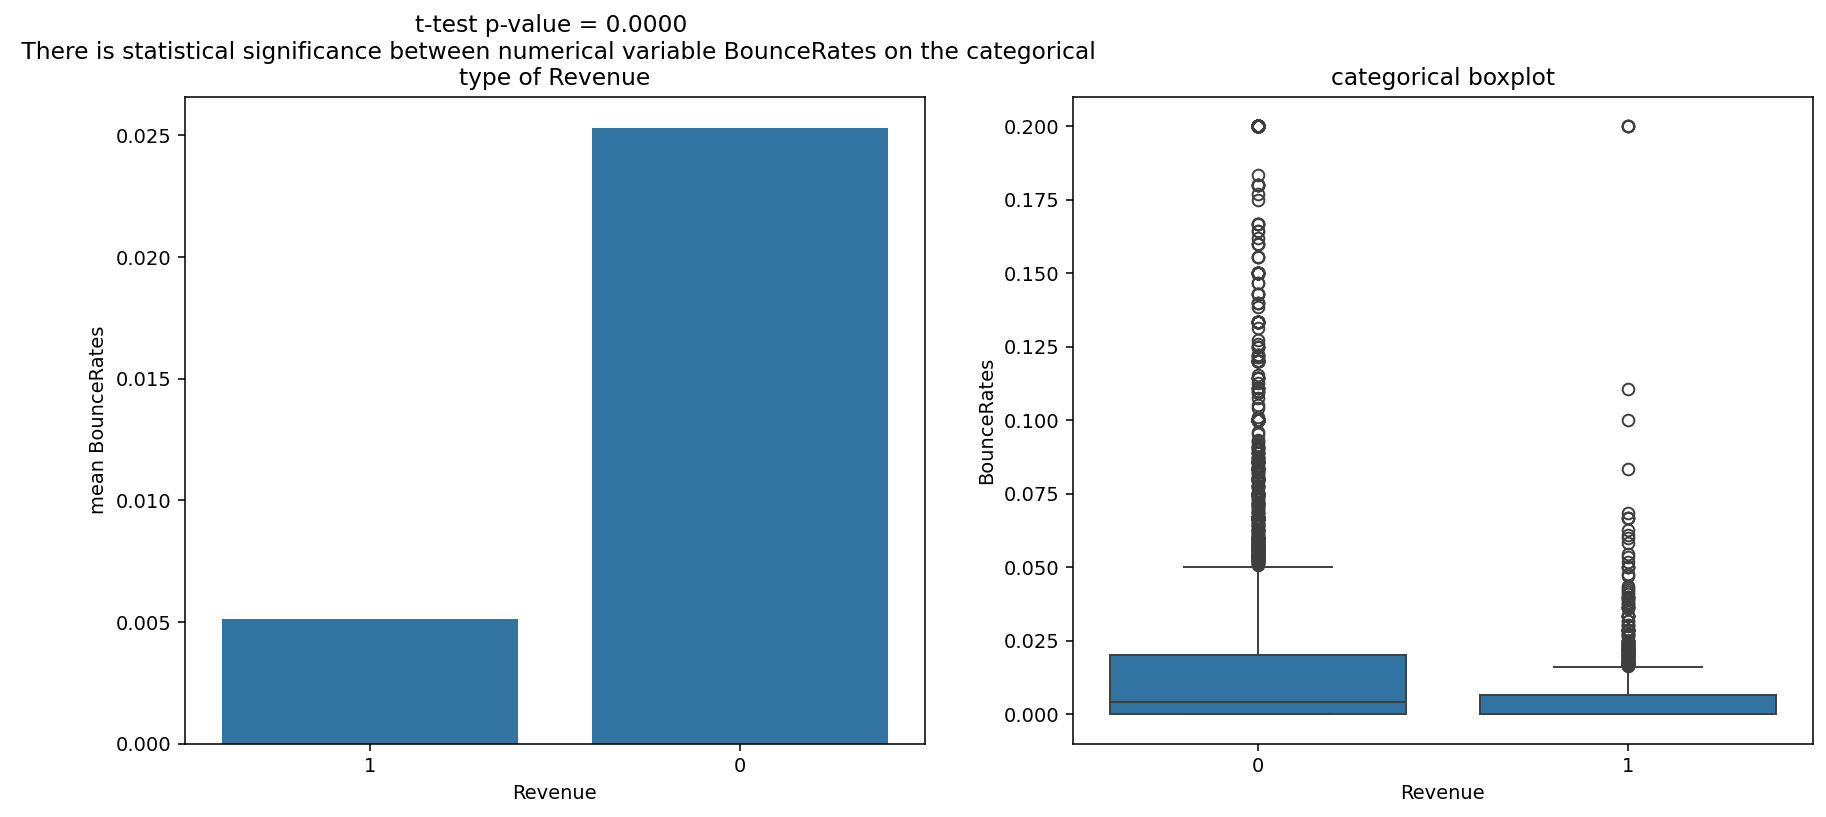

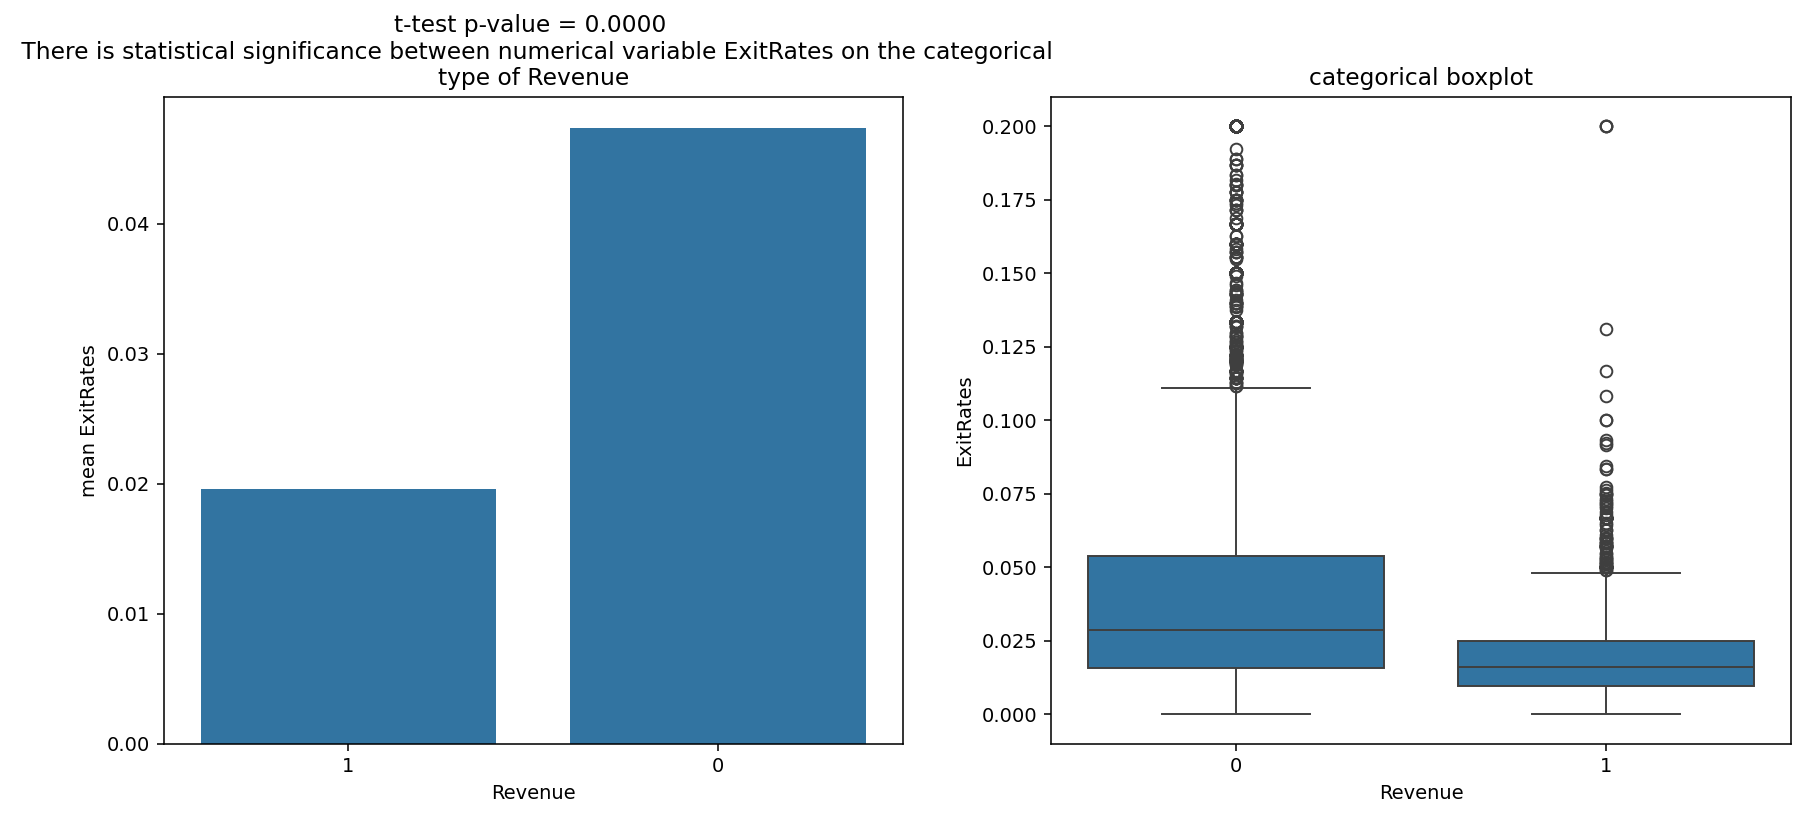

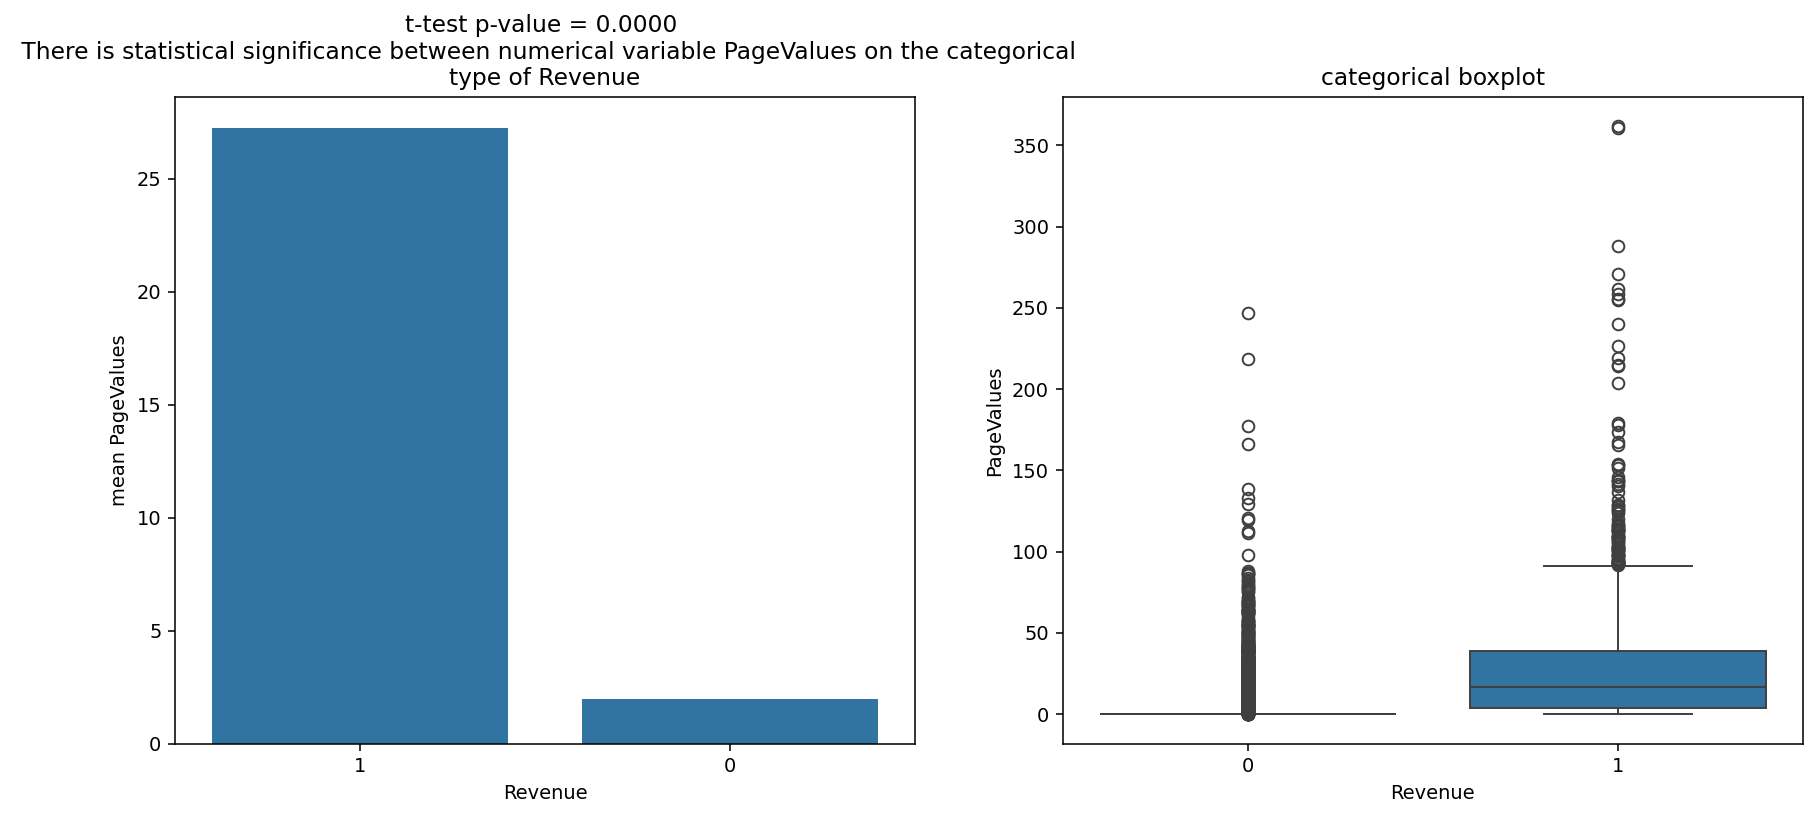

In [19]:
cat='Revenue'
for i in num_type:
    Ho=f"""There is no statistical significance between numerical variable {i} on the categorical
type of {cat}""" # Using triple quotes here
    H1=f"""There is statistical significance between numerical variable {i} on the categorical
type of {cat}""" # And here
    cont=i
    Bivariate_cont_cat(df, cont, cat,1 ,Ho,H1)

### Bivariate categorical- Categorical Analysis

In [20]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

In [21]:
cat_type_analysis=cat_type[:len(cat_type)-1]

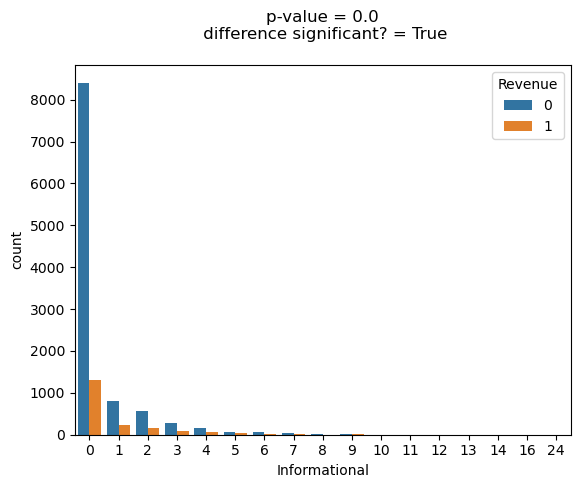

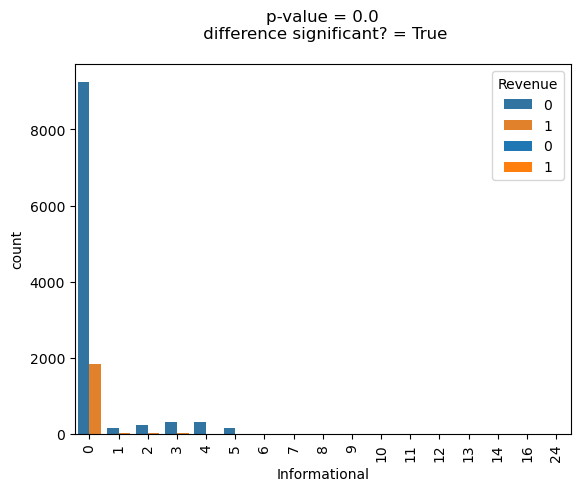

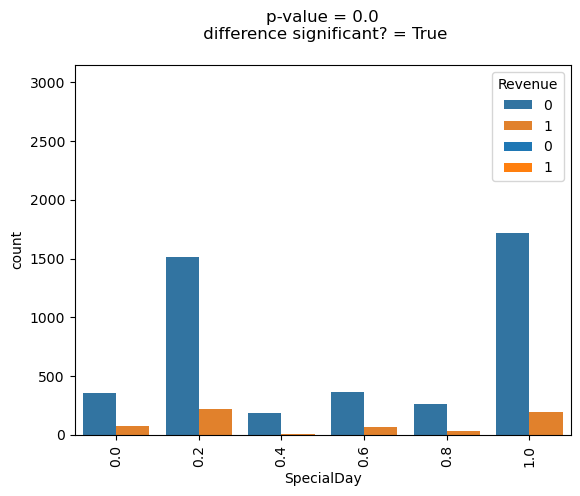

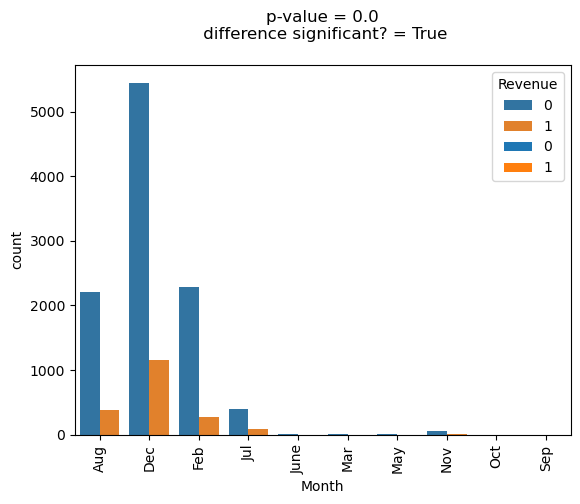

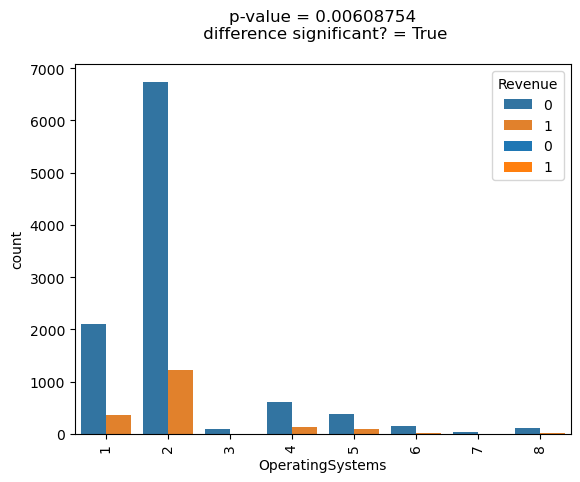

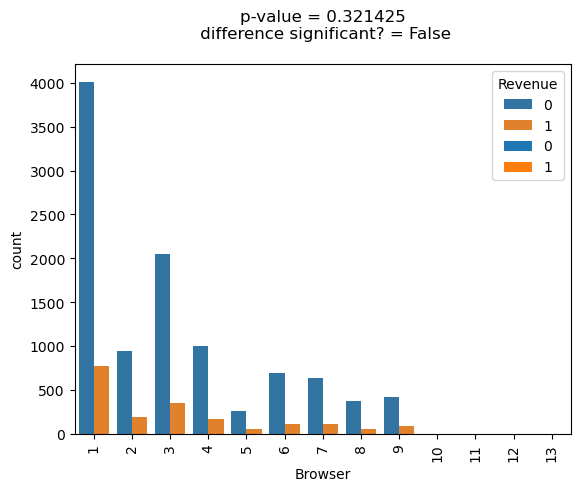

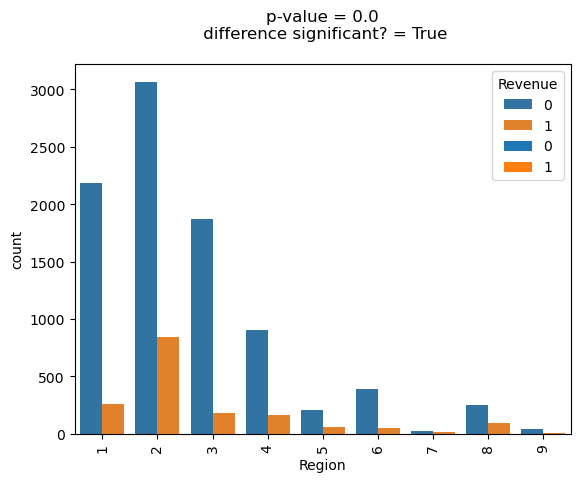

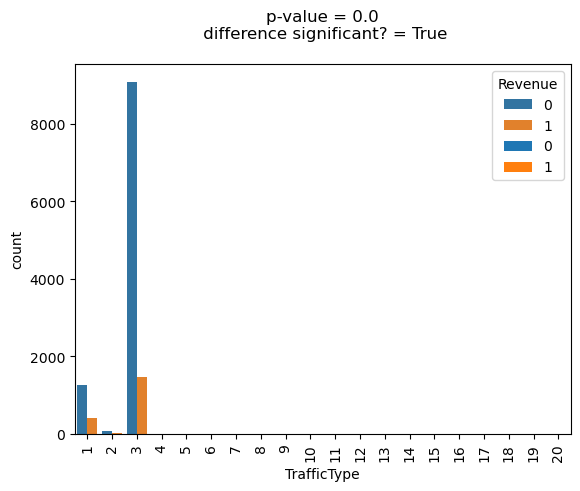

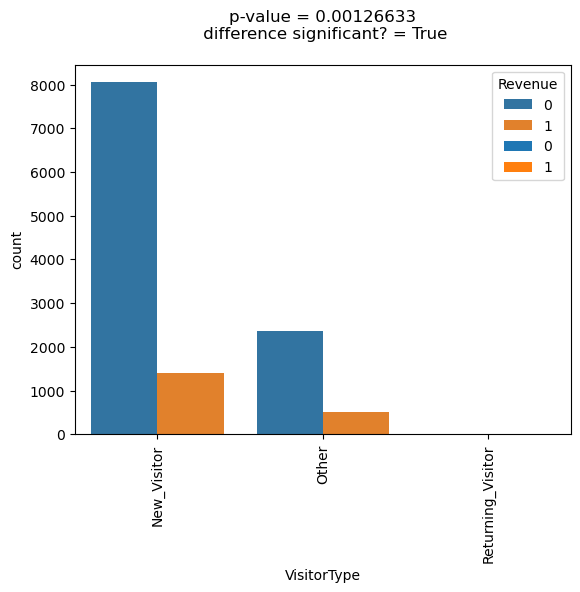

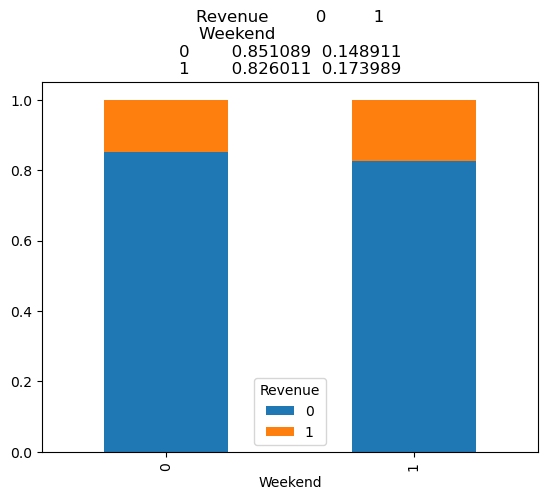

In [22]:
for i in cat_type_analysis:
    BVA_categorical_plot(df, 'Revenue', i)

### Conclusion:
There is no significance with respect to browser, therefore, it can be dropped

In [23]:
df=df.drop(['Browser'],axis=1)

###  Step 5 :Outlier view and treatment:
- outliers expected :'ExitRates', 'ProductRelated Duration','Informational Duration','Administrative Duration'

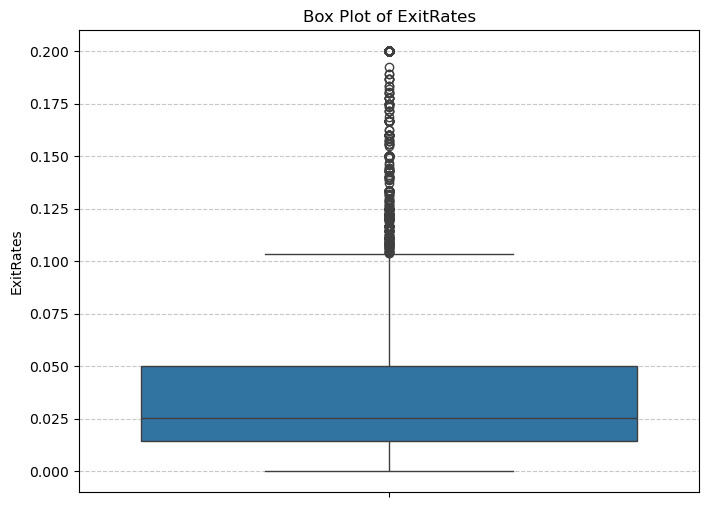

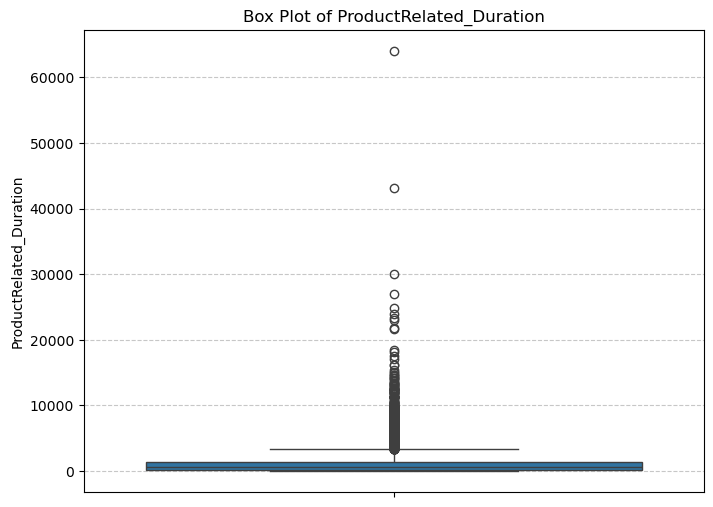

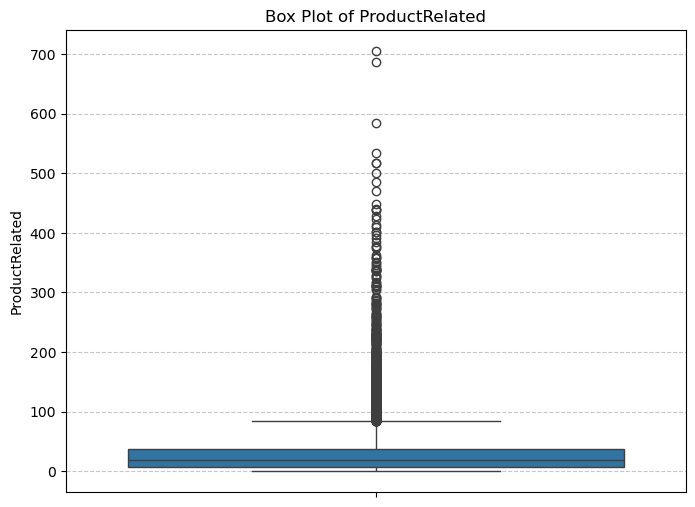

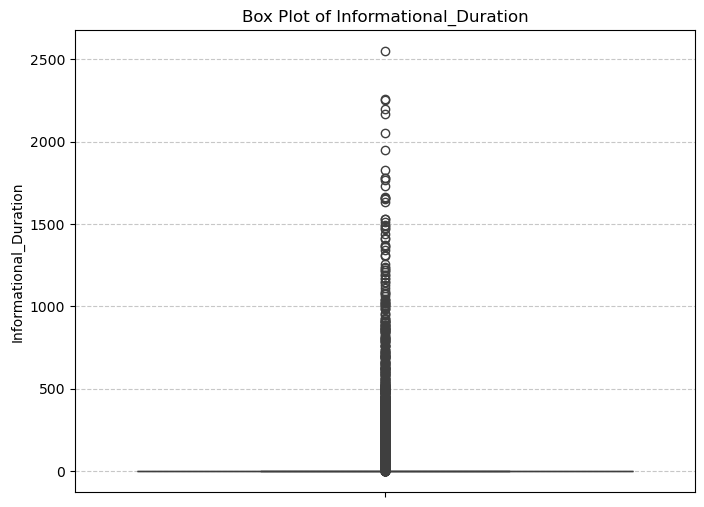

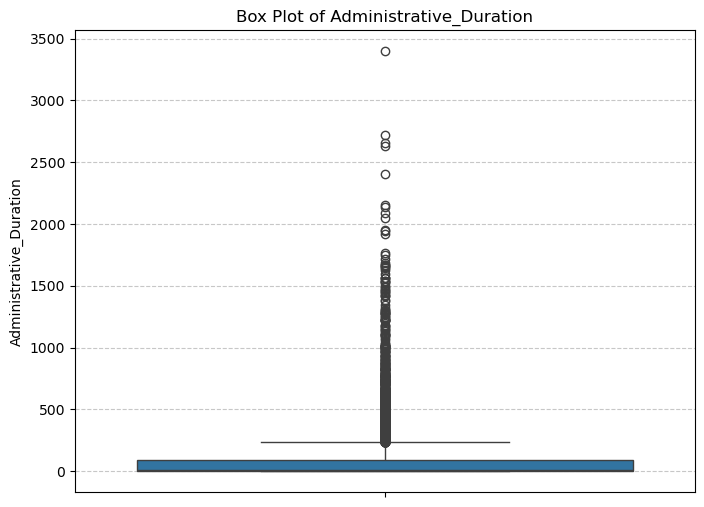

In [24]:
outlier_cols=['ExitRates', 'ProductRelated_Duration','ProductRelated', 'Informational_Duration', 'Administrative_Duration']

for col in outlier_cols:
    plt.figure(figsize=(8, 6)) # Create a new figure for each plot
    sns.boxplot(y=df[col])     # Use 'y' for a vertical boxplot, or 'x' for horizontal
    plt.title(f'Box Plot of {col}') # More descriptive title using f-string
    plt.ylabel(col)                  # Label the y-axis (or x-axis if horizontal)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
    plt.show() # Display the current plot before the loop moves to the next column

### Observation:
- The  feature ' Administrative' comes between categorical type. So covnverting it to categorical type after analysing

In [25]:
df['Administrative']=df['Administrative'].astype('category')

### Treating outlier

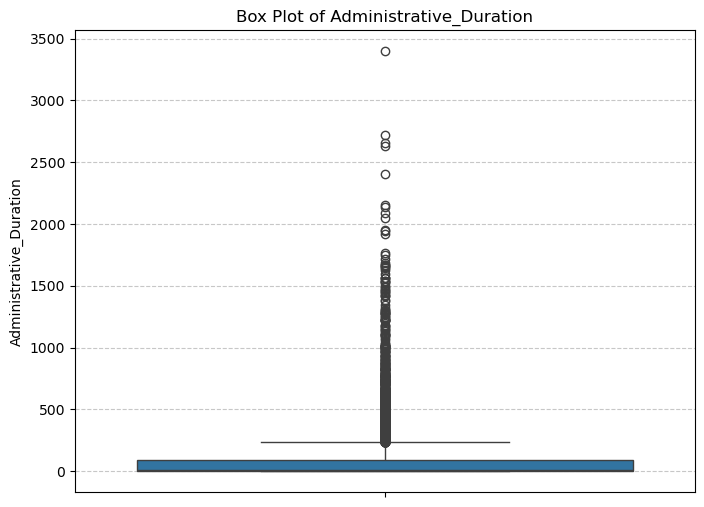

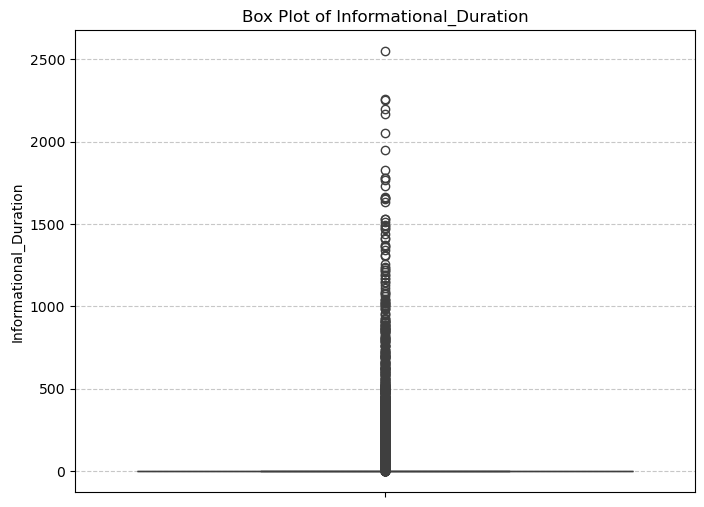

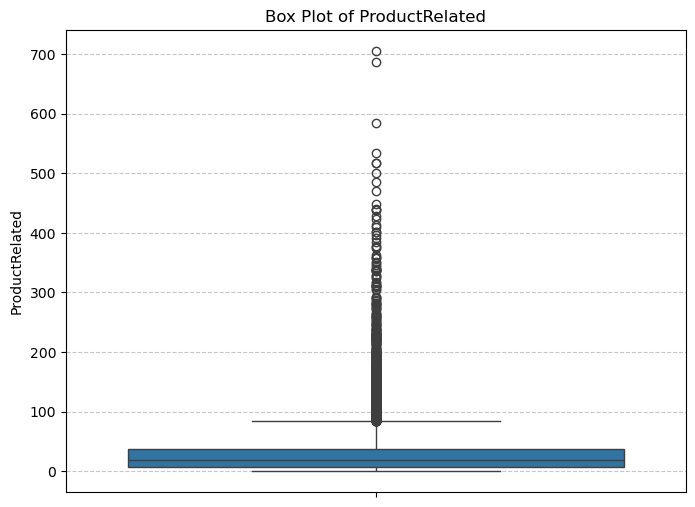

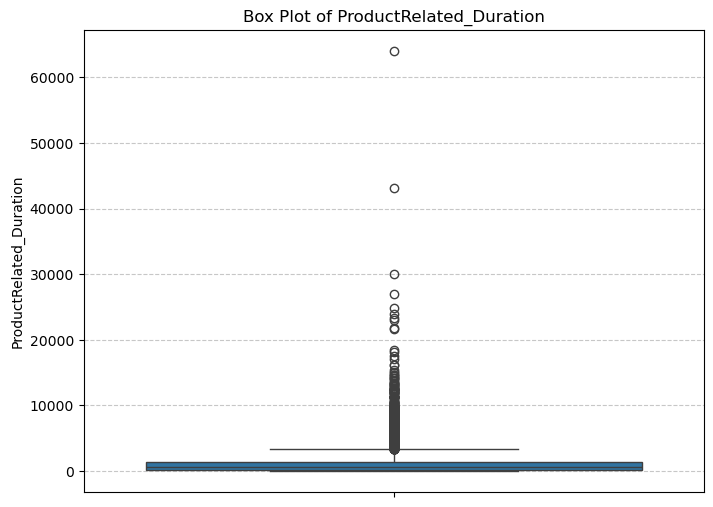

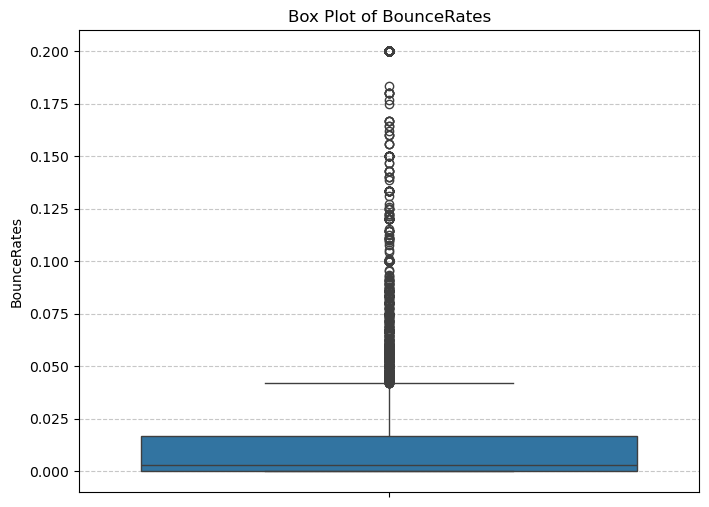

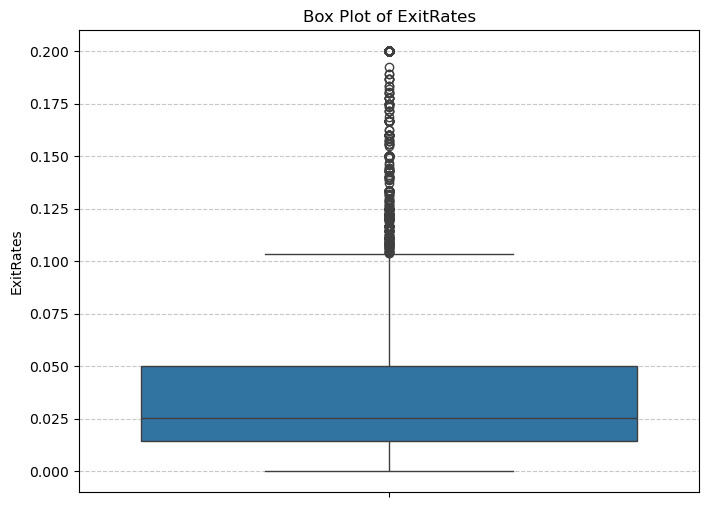

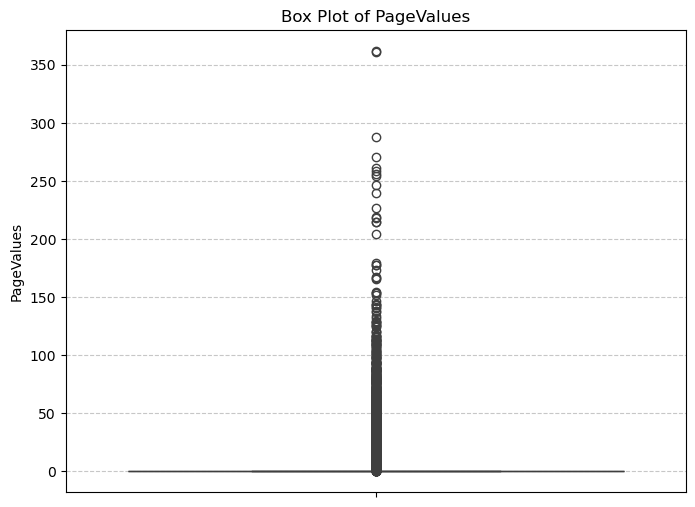

In [26]:
outlier_cols=df.select_dtypes(exclude=['category']).columns.tolist()
for col in outlier_cols:
    plt.figure(figsize=(8, 6)) # Create a new figure for each plot
    sns.boxplot(y=df[col])     # Use 'y' for a vertical boxplot, or 'x' for horizontal
    plt.title(f'Box Plot of {col}') # More descriptive title using f-string
    plt.ylabel(col)                  # Label the y-axis (or x-axis if horizontal)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
    plt.show() # Display the current plot before the loop moves to the next column

In [27]:
def OutlierTreatment(data,feature):
        quant25 = round(data[feature].quantile(0.25), 2)
        quant75 = round(data[feature].quantile(0.75), 2)
        IQR = round(quant75 - quant25, 2)
        med = round(data[feature].median(), 2)
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)
        data.loc[data[feature] > whis_high, feature] = whis_high
        data.loc[data[feature] < whis_low, feature] = whis_low
for feature in outlier_cols:
    OutlierTreatment(df, feature)   

#### outlier treatment has been completed

In [28]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.05,0.11,0.0,0.0,Feb,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.05,0.11,0.0,0.0,Feb,4,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.05,0.11,0.0,0.0,Feb,3,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,1,4,Returning_Visitor,1,0


###  Splitting:
Data has been split to train : val: test in the ration 0.6:0.2:0.2 As it is a relatively samll dataset
### Scaling the values
- we use minmax scaler
- use dummies

In [29]:
y=df['Revenue']
X=df.drop(['Revenue'],axis=1)
X=pd.get_dummies(X)
X
boolean_type=X.select_dtypes(include=['bool']).columns.tolist()
for i in boolean_type:
    X[i]=X[i].apply(lambda x: 1 if x==True else 0)
X

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Administrative_0,Administrative_1,Administrative_2,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_0,Weekend_1
0,0.0,0.0,1.0,0.000000,0.050000,0.110000,0.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,1.0,0.000000,0.050000,0.110000,0.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,2.0,2.666667,0.050000,0.110000,0.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12326,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12327,0.0,0.0,6.0,184.250000,0.050000,0.086667,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12328,75.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [31]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2,random_state=42,
                                             shuffle=True,stratify=y_train)


### SMOTE
- It can be applied to training set

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,sampling_strategy='auto')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


#### Creating a datframe to store the results of: 
1. Logistic Regression
2. SVM
3. Decision Tree

In [33]:
result=pd.DataFrame()

### Using Logistic  regression

In [34]:
from sklearn.linear_model import LogisticRegression
model_Logistic=LogisticRegression(solver='liblinear',C=0.00001)
model_Logistic.fit(X_train_res,y_train_res)

LogisticRegression(C=1e-05, solver='liblinear')

In [35]:
y_train_res_predict=model_Logistic.predict(X_train_res)
y_val_predict=model_Logistic.predict(X_val)
y_test_predict=model_Logistic.predict(X_test)

#### Creating a function for easier entry of test score for comparison

In [36]:
def append_result(result,new_row_data):
    next_index = len(result)
    result.loc[next_index] = new_row_data

In [40]:
from sklearn.metrics import f1_score
f1_train=f1_score(y_train_res,y_train_res_predict)
f1_val=f1_score(y_val,y_val_predict)
f1_test=f1_score(y_test,y_test_predict)

data_for_row = {
    'name': ["Logistic Regression"],
    'Train': [f1_train],
    'Validation': [f1_val],
    'Test': [f1_test]
}
columns = ['name', 'Train', 'Validation', 'Test']
result = pd.DataFrame(columns=columns)
append_result(result,data_for_row)

In [41]:
result

,name,Train,Validation,Test
0,[Logistic Regression],[0.7134632725254907],[0.36348949919224555],[0.35496688741721855]


### Using Decision Tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7], # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'] # Number of features to consider at each split
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='f1', # Optimize for F1-score, especially important with imbalance
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_res, y_train_res)
best_dt_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [43]:
y_train_res_predict=best_dt_model.predict(X_train_res)
y_val_predict=best_dt_model.predict(X_val)
y_test_predict=best_dt_model.predict(X_test)
f1_train_dt=f1_score(y_train_res,y_train_res_predict)
f1_val_dt=f1_score(y_val,y_val_predict)
f1_test_dt=f1_score(y_test,y_test_predict)

In [44]:
new_row_data = {
    'name': "Decision Tree",
    'Train': f1_train_dt,
    'Validation': f1_val_dt,
    'Test': f1_test_dt
}
append_result(result,new_row_data)

#### SVM

In [45]:
from sklearn.svm import SVC
## Using Poly
svc = SVC(kernel = 'poly')
svc.fit(X_train_res, y_train_res)

SVC(kernel='poly')

In [46]:
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_poly_3",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}

append_result(result,new_row_data)


##### SVC poly 2

In [47]:
svc = SVC(kernel = 'poly',degree=2)
svc.fit(X_train_res, y_train_res)
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_poly_2",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}
append_result(result,new_row_data)

In [48]:
svc = SVC(kernel = 'poly',degree=1)
svc.fit(X_train_res, y_train_res)
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_poly_1",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}
append_result(result,new_row_data)

In [49]:
svc = SVC(kernel = 'poly',degree=4)
svc.fit(X_train_res, y_train_res)
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_poly_4",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}
append_result(result,new_row_data)

In [50]:
svc = SVC(kernel = 'poly',degree=5)
svc.fit(X_train_res, y_train_res)
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_poly_5",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}
append_result(result,new_row_data)

In [51]:
result

,name,Train,Validation,Test
0,[Logistic Regression],[0.7134632725254907],[0.36348949919224555],[0.35496688741721855]
1,Decision Tree,0.774881,0.361905,0.374302
2,SVC_poly_3,0.903731,0.350711,0.36555
3,SVC_poly_2,0.850021,0.347466,0.380068
4,SVC_poly_1,0.757035,0.371237,0.37047
5,SVC_poly_4,0.934551,0.326425,0.361371
6,SVC_poly_5,0.955074,0.340599,0.345355


### Using  rbf / Gaussian

In [52]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train_res, y_train_res)
f1_train=f1_score(y_train_res,svc.predict(X_train_res))
f1_val=f1_score(y_val,svc.predict(X_val))
f1_test=f1_score(y_test,svc.predict(X_test))
new_row_data = {
    'name': "SVC_rbf",
    'Train': f1_train,
    'Validation': f1_val,
    'Test': f1_test
}
append_result(result,new_row_data)

### Now varying rbf using range of gammas

In [53]:
g = [0.1,1,10,15,100,1000]
for i in g:
    svc = SVC(kernel = 'rbf',gamma=i)
    svc.fit(X_train_res, y_train_res)
    f1_train=f1_score(y_train_res,svc.predict(X_train_res))
    f1_val=f1_score(y_val,svc.predict(X_val))
    f1_test=f1_score(y_test,svc.predict(X_test))
    new_row_data = {
        'name': f"SVC_rbf_gamma_{i}",
        'Train': f1_train,
        'Validation': f1_val,
        'Test': f1_test
    }
    append_result(result,new_row_data)
    

### The f1 scores of various models

In [54]:
result

,name,Train,Validation,Test
0,[Logistic Regression],[0.7134632725254907],[0.36348949919224555],[0.35496688741721855]
1,Decision Tree,0.774881,0.361905,0.374302
2,SVC_poly_3,0.903731,0.350711,0.36555
3,SVC_poly_2,0.850021,0.347466,0.380068
4,SVC_poly_1,0.757035,0.371237,0.37047
5,SVC_poly_4,0.934551,0.326425,0.361371
6,SVC_poly_5,0.955074,0.340599,0.345355
7,SVC_rbf,0.901423,0.324324,0.358467
8,SVC_rbf_gamma_0.1,0.893127,0.322108,0.3548
9,SVC_rbf_gamma_1,0.98138,0.170022,0.148551


####  Conclusion:
- The incresing gamma values lead to over fitting
- Trying with lower values

In [55]:
g = [0.1,0.01,0.001,0.0001,0.00001]
for i in g:
    svc = SVC(kernel = 'rbf',gamma=i)
    svc.fit(X_train_res, y_train_res)
    f1_train=f1_score(y_train_res,svc.predict(X_train_res))
    f1_val=f1_score(y_val,svc.predict(X_val))
    f1_test=f1_score(y_test,svc.predict(X_test))
    new_row_data = {
        'name': f"SVC_rbf_gamma_{i}",
        'Train': f1_train,
        'Validation': f1_val,
        'Test': f1_test
    }
    append_result(result,new_row_data)

In [56]:
result

,name,Train,Validation,Test
0,[Logistic Regression],[0.7134632725254907],[0.36348949919224555],[0.35496688741721855]
1,Decision Tree,0.774881,0.361905,0.374302
2,SVC_poly_3,0.903731,0.350711,0.36555
3,SVC_poly_2,0.850021,0.347466,0.380068
4,SVC_poly_1,0.757035,0.371237,0.37047
5,SVC_poly_4,0.934551,0.326425,0.361371
6,SVC_poly_5,0.955074,0.340599,0.345355
7,SVC_rbf,0.901423,0.324324,0.358467
8,SVC_rbf_gamma_0.1,0.893127,0.322108,0.3548
9,SVC_rbf_gamma_1,0.98138,0.170022,0.148551


# Final Conclusions:
- Scaling using min max has been done
- there is a lote of overfitting despite SMOTE being used- Perhps SMOTE  need to be fine tuned
- Our Validation and test sets show the same scores, they are similar in nature
